In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [121]:
data = pd.read_csv('maladie_cardiaque.csv', usecols=lambda column: column != 'Unnamed: 0',index_col = 'id')

In [122]:
data['cholesterol'] = data["cholesterol"].map({'normal': 1, 'eleve': 2, 'tres eleve':3})

In [123]:
data['malade'] = data["malade"].map({'oui': 1, 'non': 0})
data['fumeur'] = data["fumeur"].map({'fumeur': 1, 'non fumeur': 0})
data['conso_alco'] = data["conso_alco"].map({'oui': 1, 'non': 0})

In [124]:
def imc_category(row):
    taille_m = row['taille'] / 100  # Convertir la taille en mètres
    imc = row['Poids'] / (taille_m ** 2)  # Calculer l'IMC
    if imc < 18.5:
        return 'Maigre'
    elif imc < 25:
        return 'Normal'
    elif imc < 30:
        return 'Surpoids'
    else:
        return 'Obèse'
data['IMC'] = data.apply(lambda row: row['Poids'] / ((row['taille'] / 100) ** 2), axis=1)
data['IMC_Category'] = data.apply(imc_category, axis=1)

In [125]:
data["age"] = round(data["age"]/365.25,2)

In [126]:
# Créer les intervalles pour les classes d'âge
bins = [0, 18, 30, 45, 60, 100]

# Créer les étiquettes pour les classes d'âge
labels = ['moins de 18 ans', '18-30 ans', '30-45 ans', '45-60 ans', 'plus de 60 ans']

# Créer une nouvelle colonne 'classe_age' en utilisant la méthode cut()
data['classe_age'] = pd.cut(data['age'], bins=bins, labels=labels)

In [127]:
data.sample(3)

,age,genre,taille,Poids,pression_systo,pression_diasto,cholesterol,glycemie,fumeur,conso_alco,activite_physique,malade,IMC,IMC_Category,classe_age
id,,,,,,,,,,,,,,,
24241,59.28,femme,156,61.0,110,80,1,1,0,0,1,1,25.065746,Surpoids,45-60 ans
22895,49.81,femme,158,95.0,130,80,2,1,0,0,0,1,38.054799,Obèse,45-60 ans
97947,47.95,femme,165,78.0,120,80,1,1,0,0,1,1,28.650138,Surpoids,45-60 ans


In [128]:
data.columns

Index(['age', 'genre', 'taille', 'Poids', 'pression_systo', 'pression_diasto',
       'cholesterol', 'glycemie', 'fumeur', 'conso_alco', 'activite_physique',
       'malade', 'IMC', 'IMC_Category', 'classe_age'],
      dtype='object')

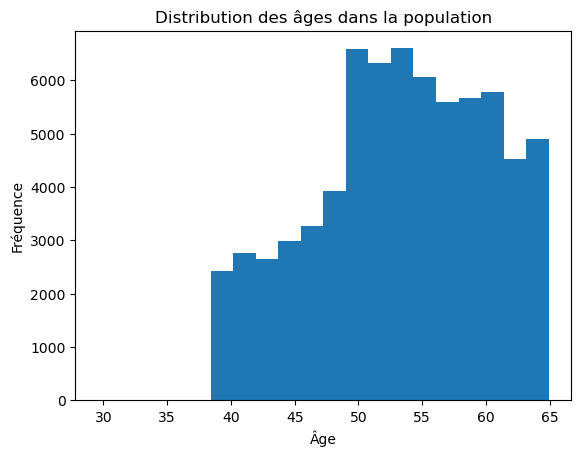

In [129]:
plt.hist(data['age'], bins=20)
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.title('Distribution des âges dans la population')
plt.show()


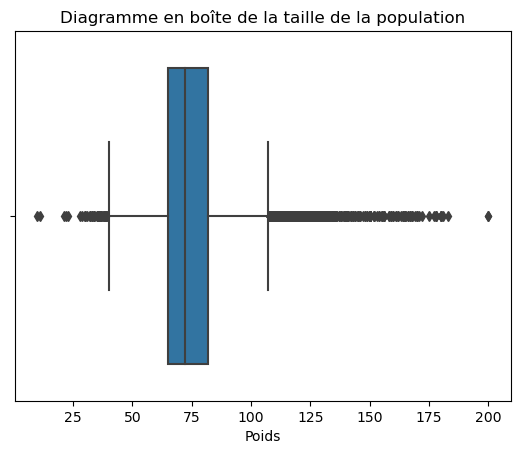

In [130]:
sns.boxplot(x=data['Poids'])
plt.xlabel('Poids')
plt.title('Diagramme en boîte de la taille de la population')
plt.show()

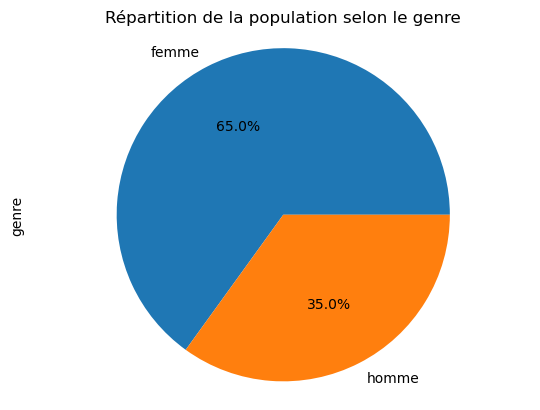

In [131]:
data['genre'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.axis('equal')
plt.title('Répartition de la population selon le genre')
plt.show()

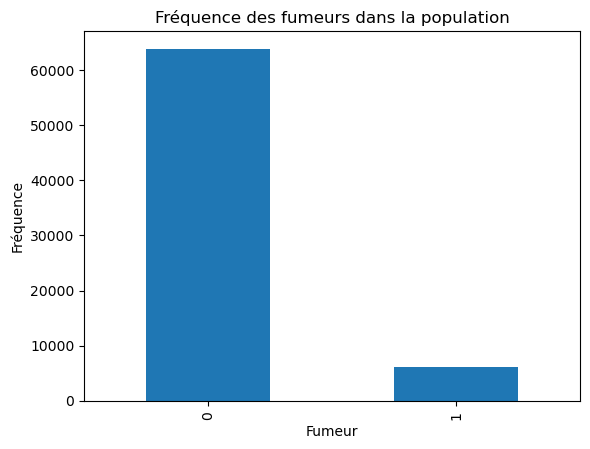

In [132]:
data['fumeur'].value_counts().plot(kind='bar')
plt.xlabel('Fumeur')
plt.ylabel('Fréquence')
plt.title('Fréquence des fumeurs dans la population')
plt.show()

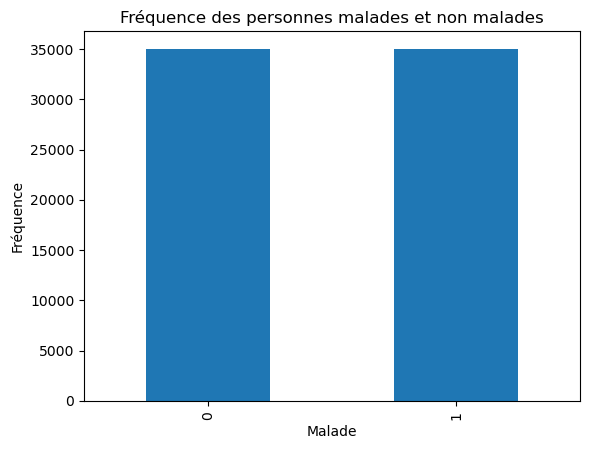

In [133]:
data['malade'].value_counts().plot(kind='bar')
plt.xlabel('Malade')
plt.ylabel('Fréquence')
plt.title('Fréquence des personnes malades et non malades')
plt.show()

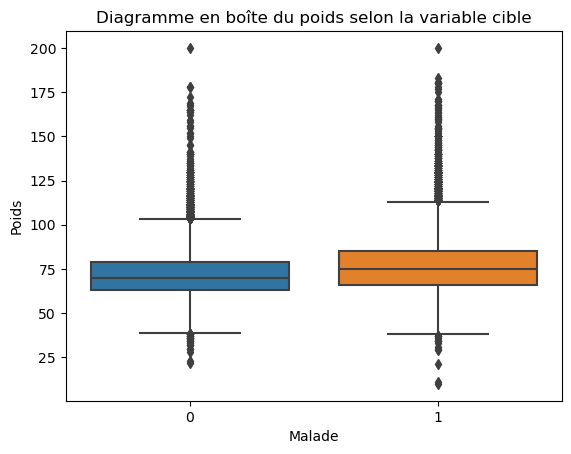

In [134]:
sns.boxplot(x='malade', y='Poids', data=data)
plt.xlabel('Malade')
plt.ylabel('Poids')
plt.title('Diagramme en boîte du poids selon la variable cible')
plt.show()

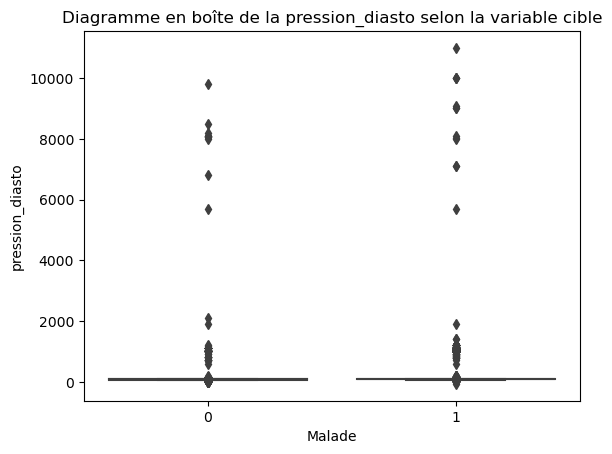

In [135]:
sns.boxplot(x='malade', y='pression_diasto', data=data)
plt.xlabel('Malade')
plt.ylabel('pression_diasto')
plt.title('Diagramme en boîte de la pression_diasto selon la variable cible')
plt.show()

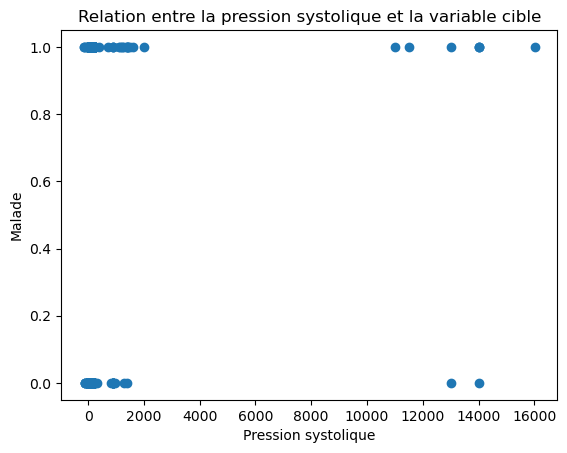

In [136]:
plt.scatter(data['pression_systo'], data['malade'])
plt.xlabel('Pression systolique')
plt.ylabel('Malade')
plt.title('Relation entre la pression systolique et la variable cible')
plt.show()


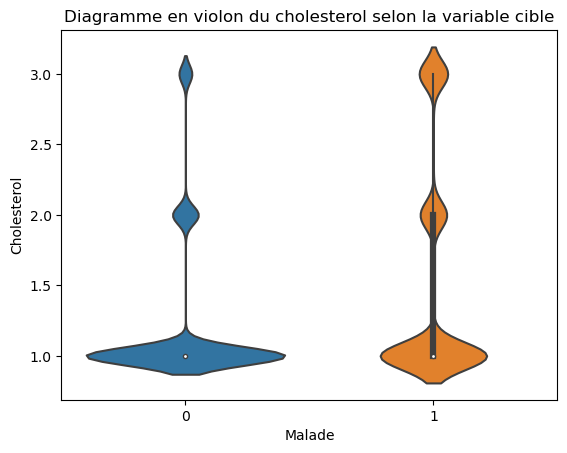

In [137]:
sns.violinplot(x='malade', y='cholesterol', data=data)
plt.xlabel('Malade')
plt.ylabel('Cholesterol')
plt.title('Diagramme en violon du cholesterol selon la variable cible')
plt.show()

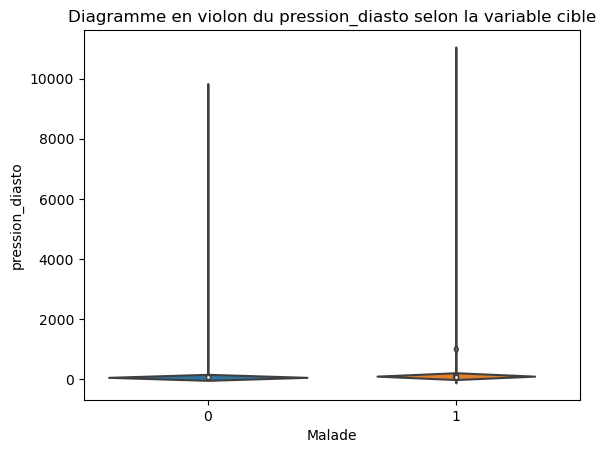

In [138]:
sns.violinplot(x='malade', y='pression_diasto', data=data)
plt.xlabel('Malade')
plt.ylabel('pression_diasto')
plt.title('Diagramme en violon du pression_diasto selon la variable cible')
plt.show()

In [143]:
def stacked_barplot(data, target_col, cat_cols):
    """
    Crée un diagramme en barres empilées pour chaque variable catégorielle dans le dataframe 'data' 
    en montrant les proportions de patients malades et non malades pour chaque catégorie.
    """
    # Calculer le nombre total de patients malades et non malades
    num_patients = len(data)
    num_malades = len(data[data[target_col] == 1])
    num_non_malades = num_patients - num_malades
    
    # Parcourir les variables catégorielles et créer un subplot pour chaque variable
    num_cols = len(cat_cols)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12,8))
    plt.subplots_adjust(hspace=0.4)
    axes = axes.ravel()[:num_cols]
    
    for i, col in enumerate(cat_cols):
        # Calculer le nombre de patients malades et non malades pour chaque catégorie de la variable
        categories = data[col].unique()
        malades_counts = [len(data[(data[col] == cat) & (data[target_col] == 1)]) for cat in categories]
        non_malades_counts = [len(data[(data[col] == cat) & (data[target_col] == 0)]) for cat in categories]
        
        # Normaliser les comptes pour obtenir des proportions
        malades_prop = [count/num_patients for count in malades_counts]
        non_malades_prop = [count/num_patients for count in non_malades_counts]

        
        # Tracer le diagramme en barres empilées
        axes[i].bar(categories, non_malades_prop, color='green', label='Non malade')
        axes[i].bar(categories, malades_prop, bottom=non_malades_prop, color='red', label='Malade')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Proportion')
        axes[i].legend()
        
    # Ajouter un titre à la figure
    fig.suptitle('Proportions de patients malades et non malades pour chaque variable catégorielle')
    
    # Afficher la figure
    plt.show()


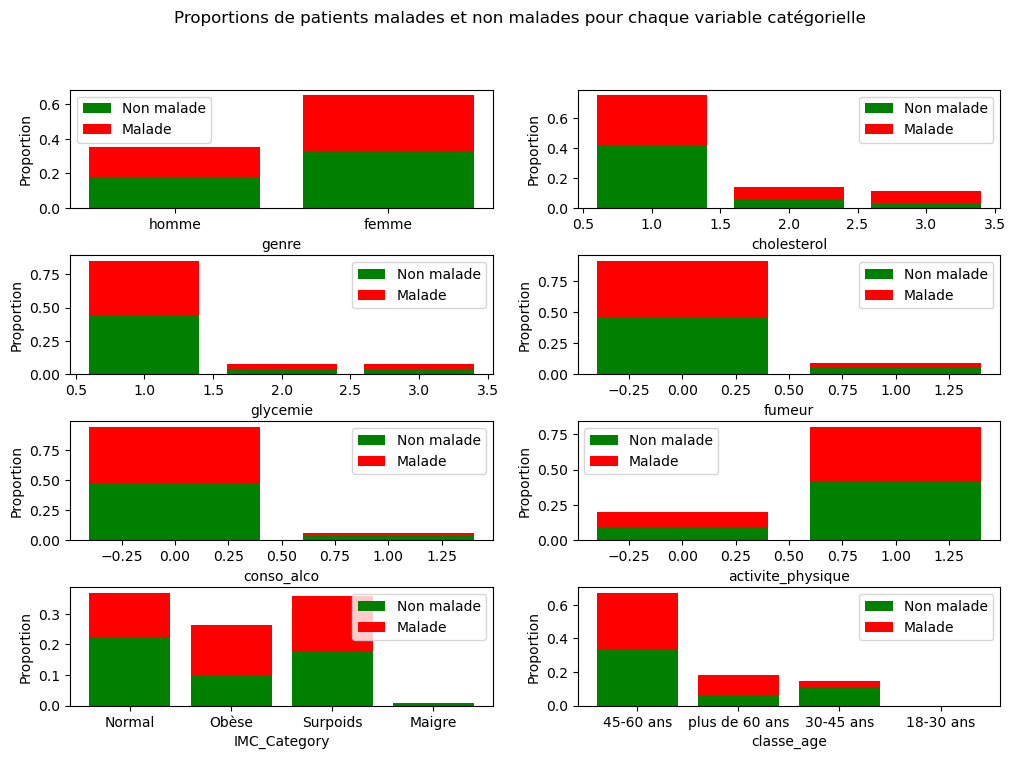

In [144]:
stacked_barplot(data, 'malade', ['genre', 'cholesterol', 'glycemie', 'fumeur', 'conso_alco', 'activite_physique', 'IMC_Category', 'classe_age'])


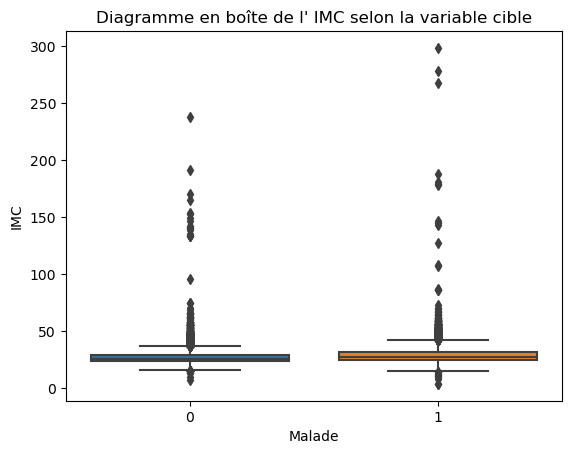

In [145]:
sns.boxplot(x='malade', y='IMC', data=data)
plt.xlabel('Malade')
plt.ylabel('IMC')
plt.title('Diagramme en boîte de l\' IMC selon la variable cible')
plt.show()

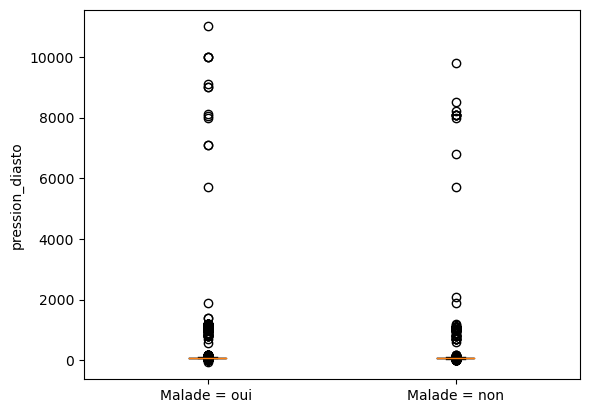

In [147]:
plt.boxplot([data.loc[data['malade'] == 1, 'pression_diasto'], data.loc[data['malade'] == 0, 'pression_diasto']])
plt.xticks([1, 2], ['Malade = oui ', 'Malade = non'])
plt.ylabel('pression_diasto')
plt.show()


In [149]:
import pandas as pd
from scipy import stats
import ptitprince as pt
import matplotlib.pyplot as plt


In [177]:
cat_cols = data.select_dtypes(exclude=['int64', 'float64']).columns
cat_cols = list(cat_cols)
cat_cols.append("glycemie")
cat_cols.append("cholesterol")
# Appliquer get_dummies sur les colonnes catégorielles
df_onehot = pd.get_dummies(data, columns=cat_cols)
df_onehot = df_onehot.drop(['classe_age_moins de 18 ans','genre_homme', 'age', 'Poids', 'taille','IMC'], axis=1)

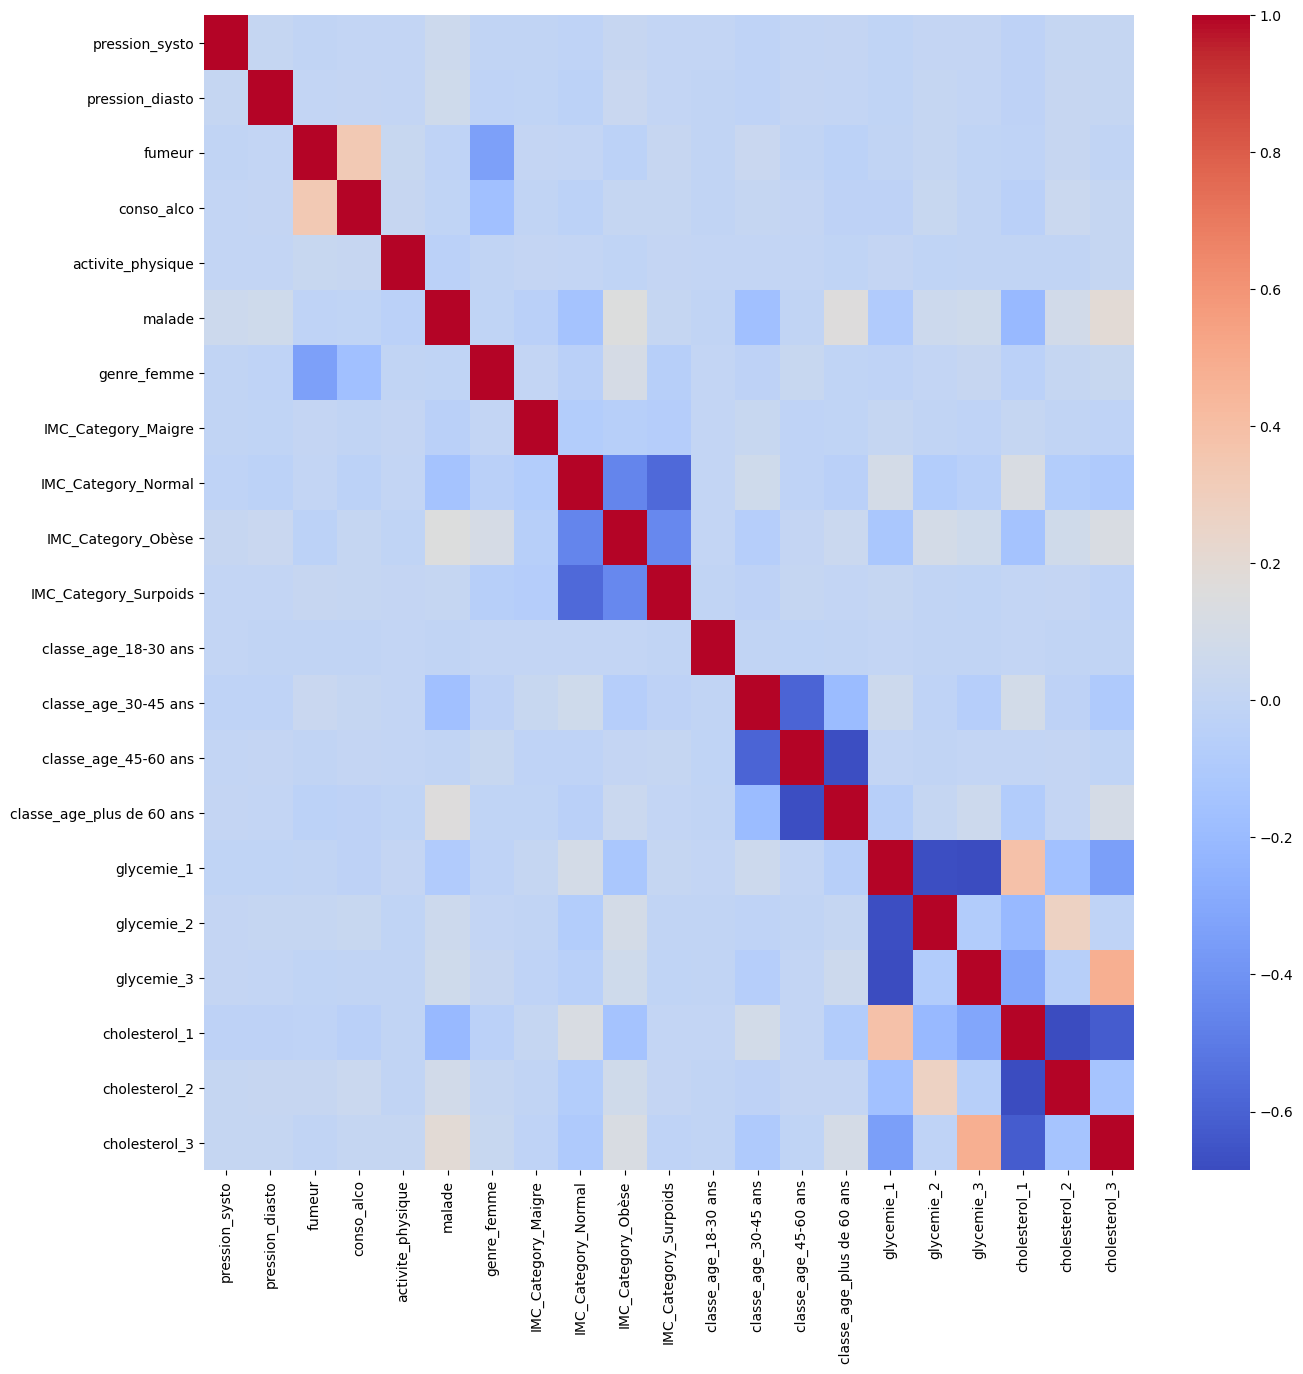

In [178]:
corr_matrix = df_onehot.corr()
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix, cmap='coolwarm')

# Afficher le graphique
plt.show()

In [179]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k - 1) * (r - 1)) / (n - 1))
    rcorr = r - ((r - 1) ** 2) / (n - 1)
    kcorr = k - ((k - 1) ** 2) / (n - 1)
    return np.sqrt(phi2corr / min((kcorr - 1), (rcorr - 1)))


In [182]:
import numpy as np
cat_cols = ['fumeur',
       'conso_alco', 'activite_physique', 'malade','genre_femme', 'IMC_Category_Maigre', 'IMC_Category_Normal',
       'IMC_Category_Obèse', 'IMC_Category_Surpoids', 'classe_age_18-30 ans',
       'classe_age_30-45 ans', 'classe_age_45-60 ans',
       'classe_age_plus de 60 ans', 'glycemie_1', 'glycemie_2', 'glycemie_3',
       'cholesterol_1', 'cholesterol_2', 'cholesterol_3']
corr_matrix = np.zeros((len(cat_cols), len(cat_cols)))
for i, var1 in enumerate(cat_cols):
    for j, var2 in enumerate(cat_cols):
        corr_matrix[i, j] = cramers_v(df_onehot[var1], df_onehot[var2])
corr_df = pd.DataFrame(corr_matrix, index=cat_cols, columns=cat_cols)


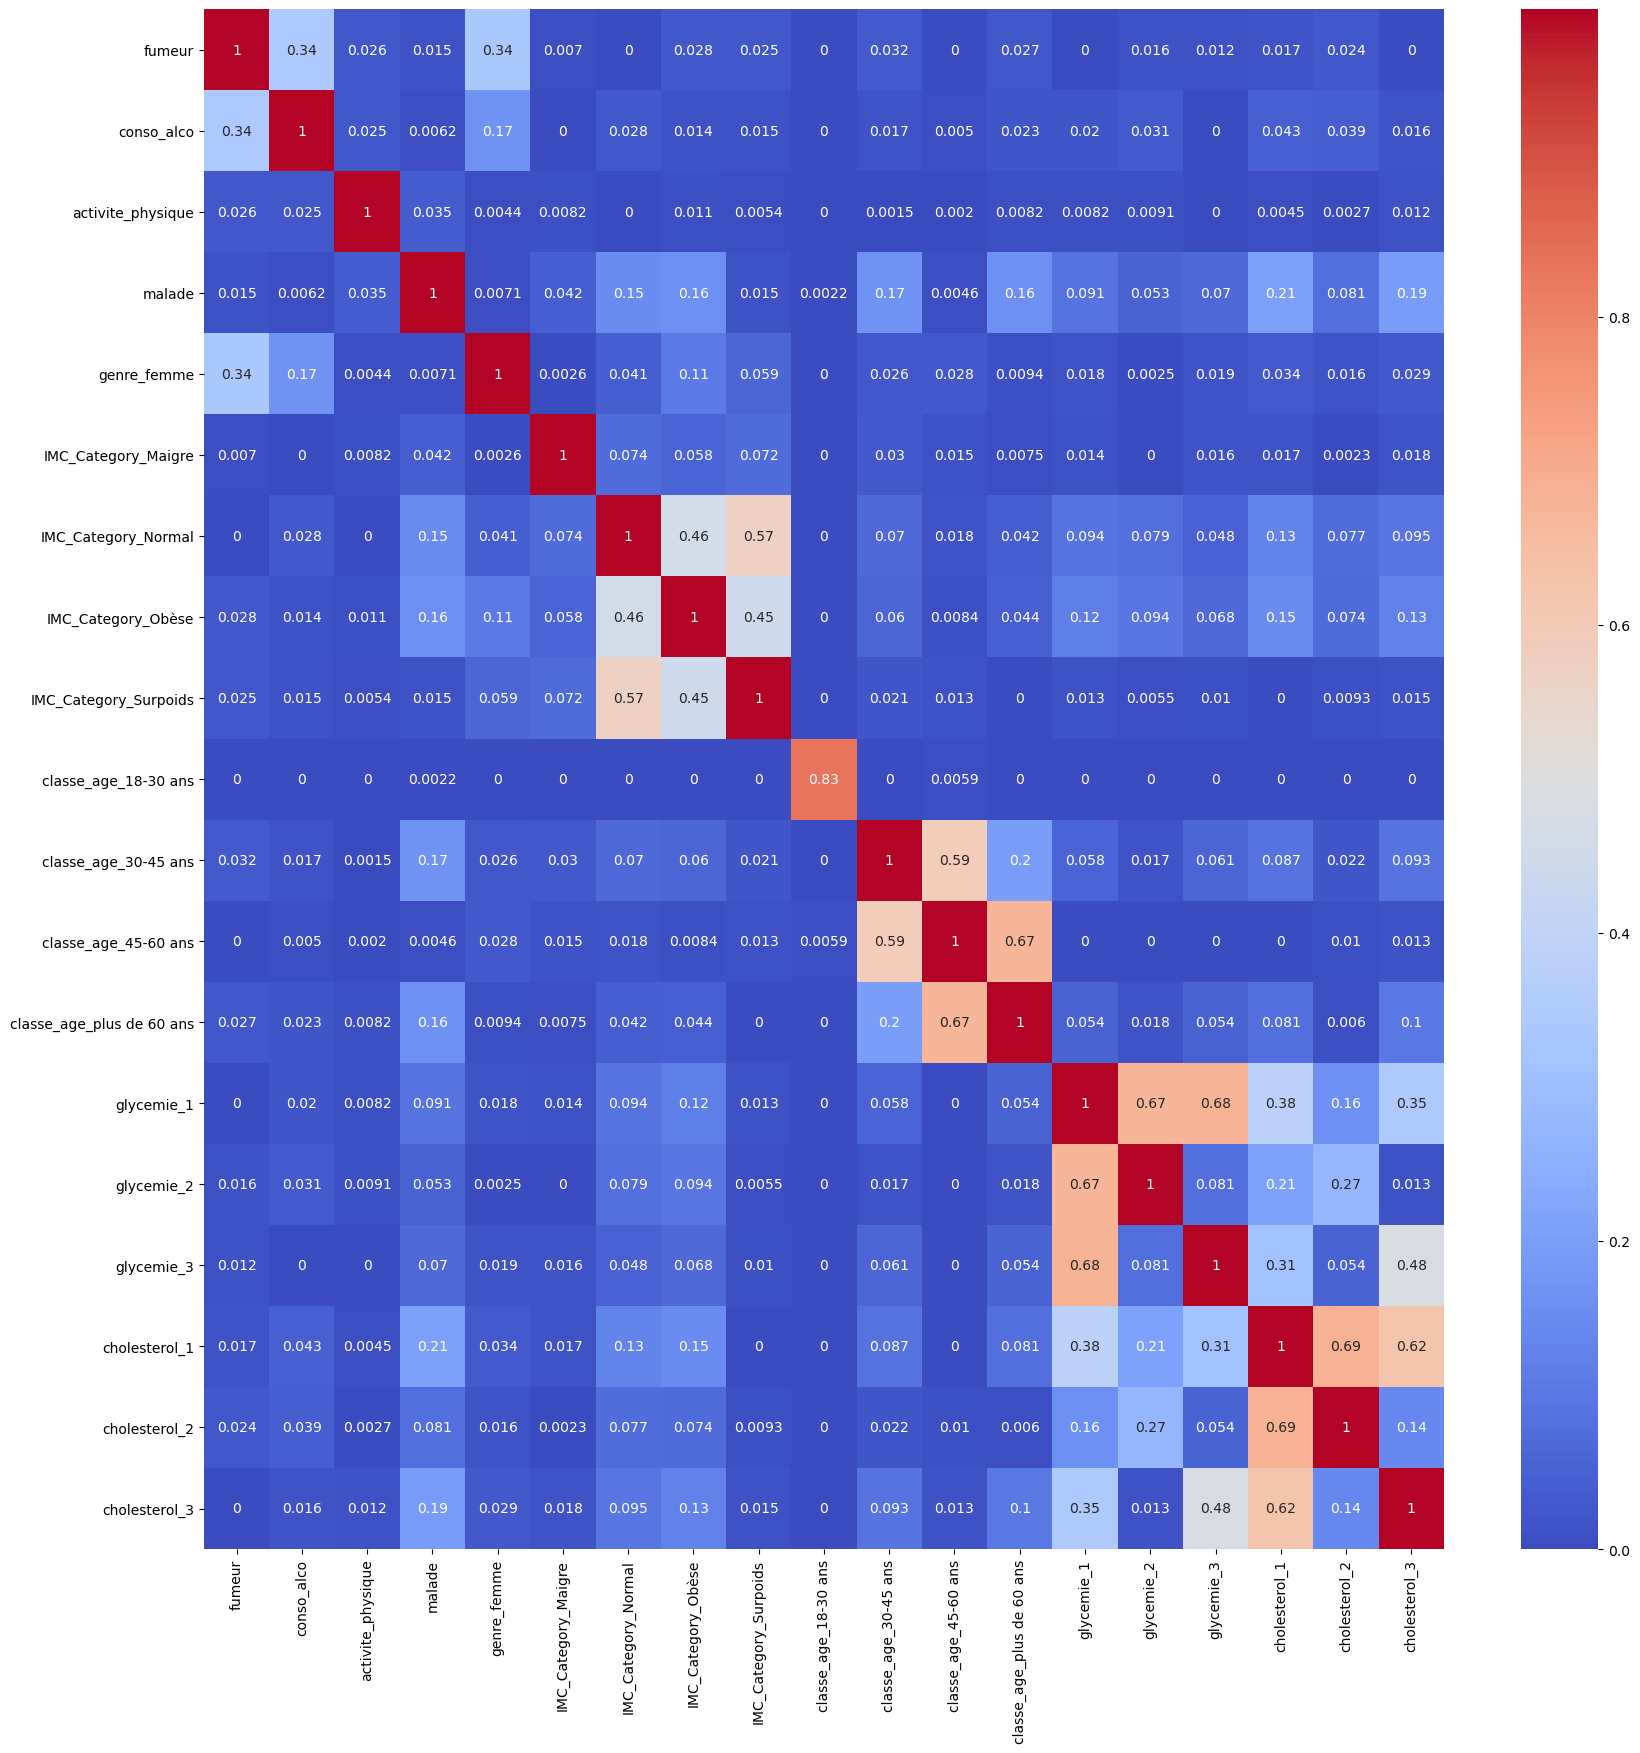

In [183]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_df, annot=True, cmap='coolwarm')
plt.show()

In [185]:
from scipy.stats import pearsonr
for colonne in df_onehot.columns:
    if colonne == 'malade':
        continue
# Calculer le coefficient de corrélation de Pearson entre la variable explicative X et la cible y
    print(colonne)
    corr, _ = pearsonr(df_onehot[colonne], df_onehot.malade)

    # Afficher le coefficient de corrélation
    print('Coefficient de corrélation de Pearson : {:.2f}'.format(corr))

pression_systo
Coefficient de corrélation de Pearson : 0.05
pression_diasto
Coefficient de corrélation de Pearson : 0.07
fumeur
Coefficient de corrélation de Pearson : -0.02
conso_alco
Coefficient de corrélation de Pearson : -0.01
activite_physique
Coefficient de corrélation de Pearson : -0.04
genre_femme
Coefficient de corrélation de Pearson : -0.01
IMC_Category_Maigre
Coefficient de corrélation de Pearson : -0.04
IMC_Category_Normal
Coefficient de corrélation de Pearson : -0.15
IMC_Category_Obèse
Coefficient de corrélation de Pearson : 0.16
IMC_Category_Surpoids
Coefficient de corrélation de Pearson : 0.02
classe_age_18-30 ans
Coefficient de corrélation de Pearson : -0.01
classe_age_30-45 ans
Coefficient de corrélation de Pearson : -0.17
classe_age_45-60 ans
Coefficient de corrélation de Pearson : -0.01
classe_age_plus de 60 ans
Coefficient de corrélation de Pearson : 0.16
glycemie_1
Coefficient de corrélation de Pearson : -0.09
glycemie_2
Coefficient de corrélation de Pearson : 0.05